In [20]:
from matplotlib import pyplot as plt, patches, gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from shapely import Polygon, difference

## Maps of region of interest

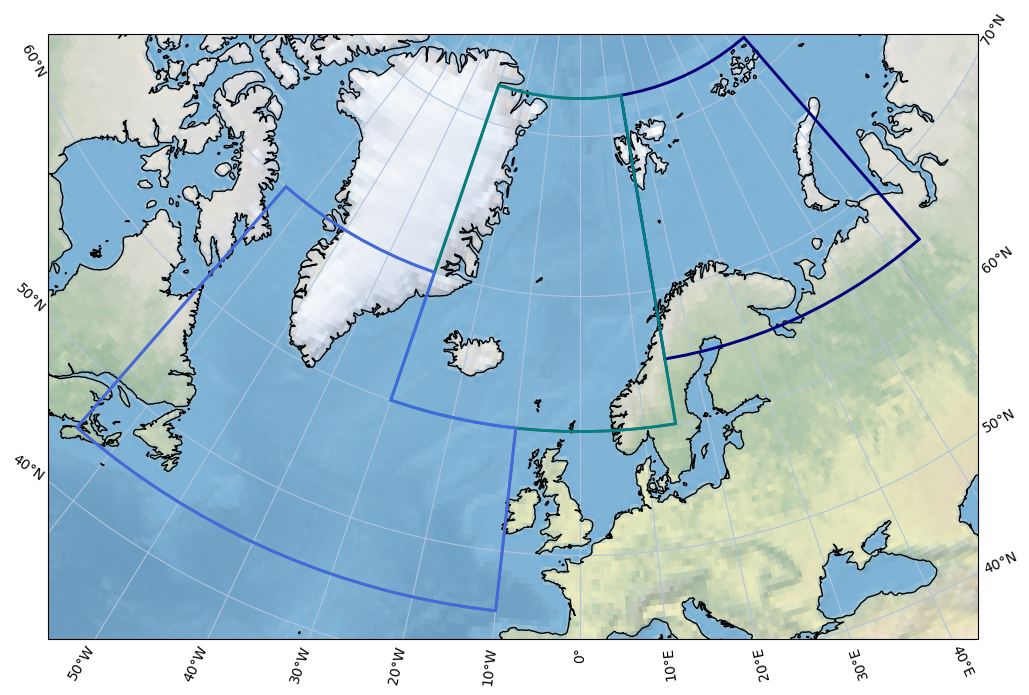

In [2]:
fig = plt.figure(figsize=[12,8])

map_proj = ccrs.LambertConformal(central_longitude=0)
map_proj._threshold /= 100

ax = plt.axes(projection=map_proj)
ax.set_extent([-67,48,43,82], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.stock_img()

gl = ax.gridlines(draw_labels=True, color = 'lightsteelblue',  xlocs = [x for x in range(-60,70,10)], \
                  ylocs = [y for y in range(40,90,10)], x_inline=False, y_inline=False, zorder=1)
gl.top_labels = False

aoi_corners = [[-65,45],[-10,45],[-10,60],[15,60],[15,65],[65,65],[65,82],[-30,82], [-30,70],[-65,70],[-65,45]]
aoi = patches.Polygon(xy=aoi_corners, edgecolor='dimgrey', facecolor='none', linewidth=2, transform=ccrs.PlateCarree(), zorder=2)
ax.add_patch(aoi)

gin_corners = [[-30,60],[15,60],[15,82],[-30,82],[-30,60]]
barents_corners = [[15,65],[65,65],[65,82],[15,82],[15,65]]
labrador_corners = [[-65,45],[-10,45],[-10,60],[-30,60],[-30,70],[-65,70],[-65,45]]

# Barents Sea subregion
barents_box = patches.Polygon(xy=barents_corners, edgecolor='navy', fc='none', lw=2, ls='-', transform=ccrs.PlateCarree(), zorder=3)
ax.add_patch(barents_box)

# Greenland-Iceland-Norwegian Seas subregion
gin_box = patches.Polygon(xy=gin_corners, edgecolor='teal', fc='none', lw=2, ls='-', transform=ccrs.PlateCarree(), zorder=4)
ax.add_patch(gin_box)

# Labrador Sea subregion
labrador_box = patches.Polygon(xy=labrador_corners, edgecolor='royalblue', fc='none', lw=2, ls='-', transform=ccrs.PlateCarree(), zorder=5)
ax.add_patch(labrador_box)

bb1_corners = [[-65,45],[-10,45],[-10,70],[-65,70],[-65,45]] # Labrador Sea
bb2_corners = [[-30,60],[10,60],[10,82],[-30,82],[-30,60]] # Most of GIN Seas
bb3_corners = [[10,65],[65,65],[65,82],[10,82],[10,65]] # Barents Sea



bb1 = patches.Polygon(xy=bb1_corners, edgecolor='purple', fc='none', lw=2, ls=':', transform=ccrs.PlateCarree(), zorder=6)
#ax.add_patch(bb1)

ValueError: 'vertices' must be 2D with shape (N, 2), but your input has shape (3, 8)

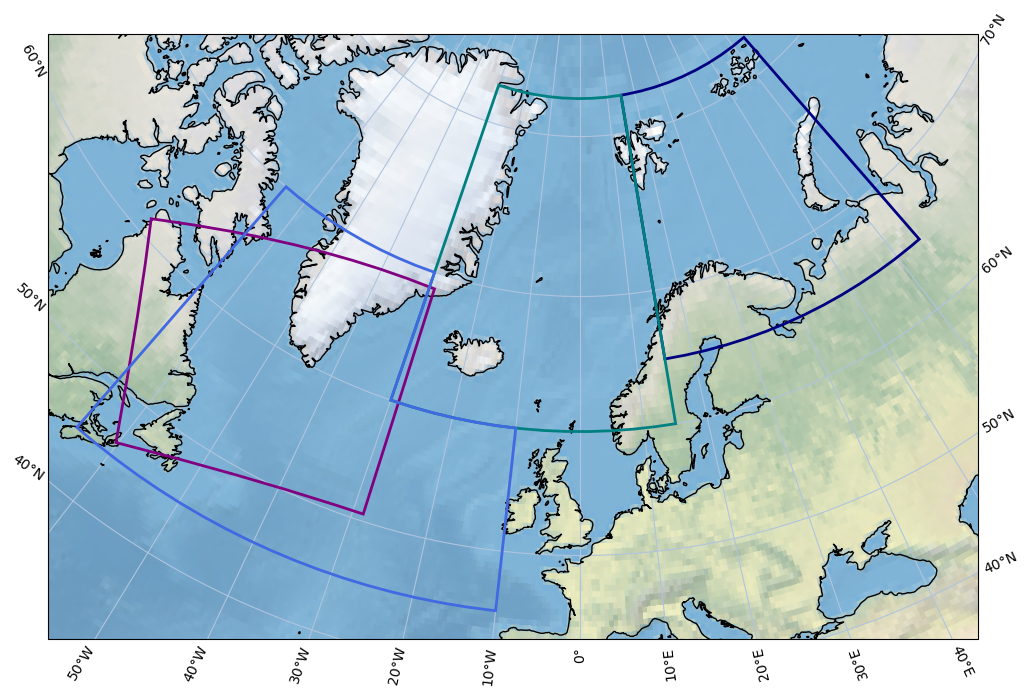

In [17]:
fig = plt.figure(figsize=[12,8])

map_proj = ccrs.LambertConformal(central_longitude=0)
map_proj._threshold /= 100

ax = plt.axes(projection=map_proj)
ax.set_extent([-67,48,43,82], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.stock_img()

gl = ax.gridlines(draw_labels=True, color = 'lightsteelblue',  xlocs = [x for x in range(-60,70,10)], \
                  ylocs = [y for y in range(40,90,10)], x_inline=False, y_inline=False, zorder=1)
gl.top_labels = False

# Example polygon from MODIS granule info
polygon = '68.899557 -28.970721 61.297234 -78.003131 46.107982 -60.249471 50.587606 -28.592569 68.899557 -28.970721'
polygon = polygon.split()
polygon = [float(x) for x in polygon]
polygon = [(polygon[i+1], polygon[i]) for i in range(0, len(polygon), 2)] # need to swap lat/lon

polygon_patch = patches.Polygon(xy=polygon, edgecolor='purple', facecolor='none', 
                                linewidth=2, transform=ccrs.Geodetic(), zorder=2) # ? Projection
ax.add_patch(polygon_patch)

# Barents Sea subregion
barents_box = patches.Polygon(xy=barents_corners, edgecolor='navy', fc='none', lw=2, ls='-', transform=ccrs.PlateCarree(), zorder=3)
ax.add_patch(barents_box)

# Greenland-Iceland-Norwegian Seas subregion
gin_box = patches.Polygon(xy=gin_corners, edgecolor='teal', fc='none', lw=2, ls='-', transform=ccrs.PlateCarree(), zorder=4)
ax.add_patch(gin_box)

# Labrador Sea subregion
labrador_box = patches.Polygon(xy=labrador_corners, edgecolor='royalblue', fc='none', lw=2, ls='-', transform=ccrs.PlateCarree(), zorder=5)
ax.add_patch(labrador_box)

# plot the intersection on the map
intersection_patch = patches.Polygon(xy=intersection.exterior.xy, edgecolor='red', facecolor='none', 
                                     linewidth=2, transform=ccrs.Geodetic(), zorder=6)
ax.add_patch(intersection_patch)

In [15]:
labrador_box = patches.Polygon(xy=labrador_corners, edgecolor='gold', fc='none', lw=2, ls='-.', transform=ccrs.PlateCarree(), zorder=5)
polygon_patch = patches.Polygon(xy=polygon, edgecolor='purple', facecolor='none', 
                                linewidth=2, transform=ccrs.Geodetic(), zorder=2) # ? Projection

# calculate intersection of these two polygons
labrador_poly = Polygon(labrador_corners)
polygon_poly = Polygon(polygon)
intersection = labrador_poly.intersection(polygon_poly)

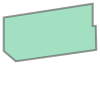

In [16]:
intersection

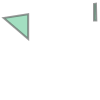

In [21]:
difference(polygon_poly, labrador_poly)

In [ ]:
# plot the intersection on the map
intersection_patch = patches.Polygon(xy=intersection.exterior.xy, edgecolor='red', facecolor='none', 
                                     linewidth=2, transform=ccrs.Geodetic(), zorder=6)
ax.add_patch(intersection_patch)

In [4]:
# Poltgons for one day's worth of MODIS granules

polygons = ['62.701894 20.645219 56.888587 62.600547 69.265475 93.384348 80.776895 11.079099 62.701894 20.645219',
 '80.360472 13.960098 68.877821 93.702143 69.173032 146.386309 80.538654 -131.883933 80.360472 13.960098',
 '48.878056 44.912723 44.689877 75.786627 60.39481 91.583795 67.160205 44.255483 48.878056 44.912723',
 '66.670594 45.105119 60.081395 92.158707 70.638846 129.299635 84.446975 23.933265 66.670594 45.105119',
 '70.629357 69.209243 63.052294 122.718943 71.241588 166.356611 87.109212 5.837132 70.629357 69.209243',
 '82.953286 -30.803906 69.667017 -120.370827 58.5815 -85.811147 64.846505 -41.415666 82.953286 -30.803906',
 '65.32226 -42.39235 58.514522 -86.250366 42.804302 -71.002899 47.005119 -41.373433 65.32226 -42.39235',
 '47.355108 -41.852758 42.828844 -71.218032 25.718668 -63.00483 29.083026 -39.478961 47.355108 -41.852758',
 '82.360542 134.037909 69.691682 -137.153556 68.175887 -84.851073 78.534922 -11.049649 82.360542 134.037909',
 '79.104455 -12.534496 67.955178 -85.420141 55.260693 -56.756706 60.869197 -16.939512 79.104455 -12.534496',
 '61.318066 -17.746412 55.218148 -57.135056 39.057687 -44.117497 43.005353 -16.280522 61.318066 -17.746412',
 '85.958534 141.383497 70.700537 -100.775945 65.861032 -51.526599 74.631123 10.661454 85.958534 141.383497',
 '75.16902 9.384176 65.686757 -52.092449 51.793034 -28.40744 56.884423 7.721013 75.16902 9.384176',
 '57.306491 7.002137 51.77438 -28.732424 35.261994 -17.484584 39.000952 8.815947 57.306491 7.002137',
 '87.504548 95.748376 70.884696 -63.68196 63.126086 -19.773788 70.690339 33.838127 87.504548 95.748376',
 '71.200152 32.737289 63.00593 -20.27802 48.221316 -0.606186 52.89511 32.532465 71.200152 32.737289',
 '76.642128 -144.800447 66.970526 -77.528117 70.539492 -26.415667 84.067419 76.168335 76.642128 -144.800447',
 '84.703021 74.930926 70.252433 -26.868292 60.108785 10.712591 66.732837 57.742337 84.703021 74.930926',
 '67.217374 56.778663 60.019309 10.248747 44.567812 26.753399 48.904819 57.451957 67.217374 56.778663',
 '62.88106 -116.872383 57.052669 -74.749613 69.366666 -43.681344 80.954314 -126.75535 62.88106 -116.872383',
 '80.536614 -123.837129 68.953462 -43.335731 69.089863 9.333161 80.364601 90.347367 80.536614 -123.837129',
 '80.955878 88.762819 68.849922 8.783879 56.866465 40.156011 62.766843 82.05756 80.955878 88.762819',
 '31.140434 -94.539428 27.863139 -70.366605 44.991173 -62.15453 49.419858 -92.934739 31.140434 -94.539428',
 '48.966072 -92.582042 44.766845 -61.658431 60.45725 -45.798499 67.245031 -93.251749 48.966072 -92.582042',
 '66.757152 -92.412162 60.145466 -45.225678 70.676966 -7.684028 84.59624 -114.521304 66.757152 -92.412162',
 '84.299605 -108.698346 70.307104 -7.608677 67.022813 43.434775 76.504595 110.767224 84.299605 -108.698346',
 '77.060172 109.375859 66.836147 42.872411 53.471342 68.818501 58.795599 106.621163 77.060172 109.375859',
 '35.117304 -69.30049 31.703173 -44.062653 48.630532 -34.753951 53.406038 -68.012238 35.117304 -69.30049',
 '52.939504 -67.581377 48.388003 -34.227723 63.447313 -15.201364 71.198576 -69.392148 52.939504 -67.581377',
 '70.713711 -68.317957 63.113297 -14.651628 71.24874 29.395105 87.14952 -135.027891 70.713711 -68.317957',
 '87.333054 -122.159416 70.899687 29.229974 64.481556 75.908384 72.584938 133.356571 87.333054 -122.159416',
 '39.099361 -44.102462 35.514774 -17.580604 52.189137 -6.901332 57.395081 -43.201244 39.099361 -44.102462',
 '56.920036 -42.705776 51.933837 -6.369932 66.14145 16.702117 75.127803 -46.375693 56.920036 -42.705776',
 '74.671694 -44.641119 65.77708 17.211313 70.967719 66.674768 85.703731 -173.838228 74.671694 -44.641119',
 '43.084922 -18.954875 39.288576 9.112224 55.639797 21.519255 61.378828 -18.551962 43.084922 -18.954875',
 '60.893238 -17.942043 55.35838 22.087004 68.393521 50.22484 79.026847 -24.95218 60.893238 -17.942043',
 '78.590278 -22.601807 68.028329 50.588635 69.874263 103.121263 82.179975 -167.097614 78.590278 -22.601807',
 '47.066079 6.14558 43.011963 36.052906 58.946983 50.656758 65.353747 5.883726 47.066079 6.14558',
 '64.864765 6.634052 58.643159 51.234445 70.090214 85.402722 82.81669 -7.702864 64.864765 6.634052',
 '82.442352 -3.691023 69.725691 85.580978 68.087247 138.06121 78.360295 -148.694786 82.442352 -3.691023']

In [31]:
# Daylight only (1st January 2022)

polygons = ['65.32226 -42.39235 58.514522 -86.250366 42.804302 -71.002899 47.005119 -41.373433 65.32226 -42.39235',
 '47.355108 -41.852758 42.828844 -71.218032 25.718668 -63.00483 29.083026 -39.478961 47.355108 -41.852758',
 '61.318066 -17.746412 55.218148 -57.135056 39.057687 -44.117497 43.005353 -16.280522 61.318066 -17.746412',
 '57.306491 7.002137 51.77438 -28.732424 35.261994 -17.484584 39.000952 8.815947 57.306491 7.002137',
 '67.217374 56.778663 60.019309 10.248747 44.567812 26.753399 48.904819 57.451957 67.217374 56.778663']

In [2]:
#North Atlantic polygons

polygons = ['58.572999 -25.022957 52.863673 -61.735239 36.450516 -49.960015 40.259408 -23.265827 58.572999 -25.022957',
 '57.286156 -17.606495 51.747089 -53.232965 35.230387 -41.982387 38.975908 -15.751327 57.286156 -17.606495',
 '57.881684 -20.150211 52.267172 -56.26474 35.797013 -44.777044 39.569795 -18.339548 57.881684 -20.150211',
 '58.169255 -15.222073 52.517591 -51.582381 36.07003 -39.977463 39.856055 -13.435504 58.169255 -15.222073',
 '59.219052 -10.246831 53.423016 -47.536701 37.065828 -35.486109 40.905216 -8.547749 59.219052 -10.246831',
 '57.965929 -26.621551 52.336067 -62.83823 35.875598 -51.315025 39.655421 -24.825186 57.965929 -26.621551',
 '57.180954 -19.17057 51.652788 -54.744067 35.130494 -43.535002 38.872661 -17.316979 57.180954 -19.17057',
 '58.741998 -14.164259 53.006827 -51.072345 36.61341 -39.22747 40.432709 -12.43555 58.741998 -14.164259',
 '57.83519 -23.026087 52.223924 -59.167607 35.755173 -47.699859 39.527535 -21.230831 57.83519 -23.026087',
 '57.616594 -15.552275 52.03443 -51.513025 35.548985 -40.133989 39.310296 -13.741326 57.616594 -15.552275',
 '58.444969 -24.338694 52.753515 -60.997685 36.334521 -49.280678 40.136692 -22.592124 58.444969 -24.338694',
 '58.624962 -16.846564 52.910231 -53.659586 36.505544 -41.867349 40.315779 -15.114685 58.624962 -16.846564',
 '58.360753 -24.477165 52.68833 -61.042908 36.25846 -49.363959 40.050464 -22.723979 58.360753 -24.477165',
 '58.854054 -16.969799 53.114851 -53.963058 36.725189 -42.075092 40.541497 -15.255484 58.854054 -16.969799',
 '56.309242 -23.360326 50.896454 -58.24414 34.220826 -47.33568 37.912962 -21.43692 56.309242 -23.360326',
 '58.496835 -23.378586 52.80704 -60.0593 36.38789 -48.323365 40.185537 -21.636561 58.496835 -23.378586',
 '59.238635 -15.852172 53.445453 -53.192406 37.08965 -41.137654 40.925729 -14.171176 59.238635 -15.852172',
 '56.244964 -29.748513 50.841541 -64.590259 34.247033 -53.742372 37.939094 -27.839243 56.244964 -29.748513',
 '57.008606 -22.233172 51.510464 -57.679697 34.973637 -46.542632 38.701152 -20.378455 57.008606 -22.233172',
 '57.791939 -14.71349 52.191032 -50.803888 35.631205 -39.318532 39.393025 -12.901023 57.791939 -14.71349',
 '57.917456 -26.124062 52.295712 -62.359211 35.835046 -50.860357 39.611333 -24.344377 57.917456 -26.124062',
 '59.119806 -18.574129 53.334657 -55.856044 36.974104 -43.851047 40.810823 -16.891451 59.119806 -18.574129',
 '60.363157 -11.008577 54.399716 -49.438408 38.066321 -36.831825 41.962024 -9.419948 60.363157 -11.008577',
 '57.445474 -24.922725 51.887367 -60.766098 35.388176 -49.457044 39.139736 -23.108708 57.445474 -24.922725',
 '58.731335 -17.372356 53.00312 -54.309277 36.608984 -42.472819 40.423353 -15.659761 58.731335 -17.372356',
 '57.234661 -23.719648 51.704035 -59.387622 35.188439 -48.162046 38.929689 -21.889464 57.234661 -23.719648',
 '58.582079 -16.171505 52.871829 -52.970831 36.38084 -41.158158 40.184846 -14.428373 58.582079 -16.171505',
 '55.692838 -30.048041 50.349577 -64.505802 33.718952 -53.858674 37.391223 -28.107488 55.692838 -30.048041',
 '57.072638 -22.513264 51.56214 -58.042427 35.033518 -46.880469 38.767772 -20.669255 57.072638 -22.513264',
 '58.493088 -14.960934 52.798102 -51.676269 36.381834 -39.941079 40.183987 -13.225984 58.493088 -14.960934',
 '55.722248 -28.834306 50.377396 -63.309312 33.747658 -52.652474 37.419794 -26.896012 55.722248 -28.834306',
 '57.215355 -21.29482 51.688235 -56.934082 35.169458 -45.716986 38.909325 -19.460848 57.215355 -21.29482',
 '58.786041 -13.735683 53.052023 -50.695216 36.5745 -38.795951 40.385175 -12.006061 58.786041 -13.735683',
 '55.976526 -27.606967 50.603298 -62.268822 33.990843 -51.519557 37.672597 -25.684933 55.976526 -27.606967',
 '57.638142 -20.056203 52.059289 -56.037289 35.572822 -44.653358 39.330665 -18.253749 57.638142 -20.056203',
 '59.352924 -12.479536 53.543284 -49.946936 37.198371 -37.842598 41.040755 -10.815359 59.352924 -12.479536',
 '56.67502 -26.366986 51.219241 -61.566498 34.657108 -50.558162 38.368689 -24.494294 56.67502 -26.366986',
 '58.443166 -18.802754 52.756902 -55.460125 36.251182 -43.707999 40.044349 -17.046406 58.443166 -18.802754',
 '60.156497 -11.212382 54.228982 -49.419682 37.956036 -36.952514 41.842654 -9.616323 60.156497 -11.212382',
 '57.50711 -25.118554 51.944654 -60.982384 35.446679 -49.650564 39.198868 -23.303761 57.50711 -25.118554',
 '59.366317 -17.53385 53.553041 -55.007326 37.209754 -42.897273 41.054558 -15.868484 59.366317 -17.53385',
 '58.680636 -23.84285 52.963907 -60.69999 36.47592 -48.847032 40.27914 -22.104642 58.680636 -23.84285',
 '58.013242 -30.136449 52.387616 -66.425096 35.929146 -54.88977 39.703283 -28.362931 58.013242 -30.136449',
 '57.081381 -21.510424 51.572371 -57.062677 35.044274 -45.89834 38.776259 -19.67454 57.081381 -21.510424',
 '59.609894 -13.886004 53.760675 -51.623616 37.442431 -39.405024 41.300134 -12.253749 59.609894 -13.886004',
 '57.103302 -27.770902 51.58928 -63.345124 35.063782 -52.171666 38.798725 -25.936333 57.103302 -27.770902',
 '56.66749 -20.33591 51.205371 -55.588369 34.649262 -44.582044 38.365827 -18.475516 56.66749 -20.33591',
 '59.460254 -12.703838 53.628354 -50.333414 37.299944 -38.181087 41.153052 -11.064746 59.460254 -12.703838',
 '57.123088 -26.580815 51.604827 -62.199984 35.083297 -51.019041 38.820489 -24.75489 57.123088 -26.580815',
 '58.143529 -19.084928 52.49537 -55.552269 36.054805 -43.965065 39.839485 -17.339483 58.143529 -19.084928',
 '57.210842 -19.180103 51.687125 -54.854519 35.169518 -43.642806 38.906898 -17.361146 57.210842 -19.180103',
 '60.358522 -11.512152 54.402075 -49.966256 38.150821 -37.407888 42.047462 -9.953903 60.358522 -11.512152',
 '58.134461 -25.405311 52.491307 -61.843837 36.046002 -50.260998 39.827423 -23.655646 58.134461 -25.405311',
 '56.964912 -19.239686 51.475096 -54.701092 34.935924 -43.585442 38.659442 -17.400717 56.964912 -19.239686',
 '60.226758 -11.569983 54.2926 -49.883423 38.028218 -37.387976 41.91576 -9.997698 60.226758 -11.569983',
 '58.037679 -25.4577 52.409852 -61.801044 35.954803 -50.258768 39.72952 -23.698857 58.037679 -25.4577']

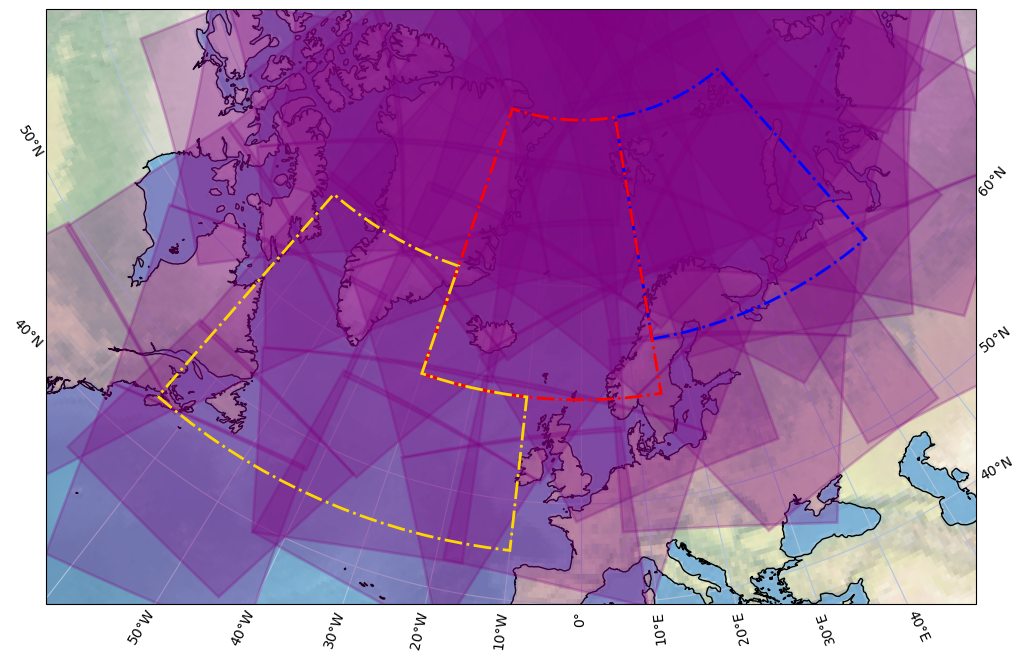

In [ ]:
fig = plt.figure(figsize=[12,8])

map_proj = ccrs.LambertConformal(central_longitude=0)
map_proj._threshold /= 100

ax = plt.axes(projection=map_proj)
ax.set_extent([-80,55,40,85], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.stock_img()

gl = ax.gridlines(draw_labels=True, color = 'lightsteelblue',  xlocs = [x for x in range(-60,70,10)], \
                  ylocs = [y for y in range(40,90,10)], x_inline=False, y_inline=False, zorder=1)
gl.top_labels = False

for polygon in polygons:
    polygon = polygon.split()
    polygon = [float(x) for x in polygon]
    polygon = [(polygon[i+1], polygon[i]) for i in range(0, len(polygon), 2)] # need to swap lat/lon

    polygon_patch = patches.Polygon(xy=polygon, edgecolor='purple', facecolor='purple', alpha=0.25,
                                linewidth=2, transform=ccrs.Geodetic(), zorder=2) # ? Projection
    ax.add_patch(polygon_patch)


# Barents Sea subregion
barents_box = patches.Polygon(xy=barents_corners, edgecolor='blue', fc='none', lw=2, ls='-.', transform=ccrs.PlateCarree(), zorder=3)
ax.add_patch(barents_box)

# Greenland-Iceland-Norwegian Seas subregion
gin_box = patches.Polygon(xy=gin_corners, edgecolor='red', fc='none', lw=2, ls='-.', transform=ccrs.PlateCarree(), zorder=4)
ax.add_patch(gin_box)

# Labrador Sea subregion
labrador_box = patches.Polygon(xy=labrador_corners, edgecolor='gold', fc='none', lw=2, ls='-.', transform=ccrs.PlateCarree(), zorder=5)
ax.add_patch(labrador_box)
